<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2

## Importing the dataset

In [0]:
import pandas as pd
NON_VAR = ['WIFE_AGE','WIFE_EDU','HUSB_EDU','NUM_OF_CHILD',\
           'WIFE_RELI','WIFE_WORK','HUSB_OCUP','STA_OF_LIV','MEDIA_EXP','CONTRACEPTIVE']
donnee = pd.read_csv("cmc.data.txt",sep=',',header=None,names=NON_VAR)

In [0]:
features = [o for o in donnee.columns if o !='CONTRACEPTIVE']
X = donnee[features]
Y = donnee['CONTRACEPTIVE']

In [0]:
#transformation of a variable into a dummy 

import numpy as np
Y = np.where(Y==1,0,1)

In [0]:
import pandas as pd
a_dummies = ['WIFE_EDU','HUSB_EDU','HUSB_OCUP','STA_OF_LIV']

for var in a_dummies:
    X.loc[:,var] = X.loc[:,var].copy().astype(str)

X_dum = pd.get_dummies(X[a_dummies])   

In [0]:
A_garder = [var for var in list(X) if var not in a_dummies]
X = X[A_garder]

X = pd.concat([X,X_dum],axis=1)

In [0]:
donnee.head(5)

,WIFE_AGE,WIFE_EDU,HUSB_EDU,NUM_OF_CHILD,WIFE_RELI,WIFE_WORK,HUSB_OCUP,STA_OF_LIV,MEDIA_EXP,CONTRACEPTIVE
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1998,test_size=0.3)

## Decisione tree model

In [0]:
from sklearn.tree import DecisionTreeClassifier
arbre = DecisionTreeClassifier()

In [0]:
#trainig the model
arbre.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#prediction:
Y_pred = arbre.predict(X_test)

In [0]:
#calculating the performance in the test set

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.6764705882352942

## Model 2

In [0]:
#creating the model
arbrebis = DecisionTreeClassifier(random_state=1998, criterion='gini', max_depth=9, min_samples_split=4,
min_samples_leaf=3)

#training

arbrebis.fit(X_train,Y_train)

#prediction:
Y_pred = arbrebis.predict(X_test)

#calculating the performance in the test set

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7013574660633484

In [0]:
Y_pred_prob = arbrebis.predict_proba(X_test)

Y_pred_prob1=arbrebis.predict_proba(X_test)[:,1]



In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred_prob1)

0.7405039527752864

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,arbrebis.predict_proba(X_test)[:,1])
auc(fpr,tpr)

0.7405039527752864

<function matplotlib.pyplot.show(*args, **kw)>

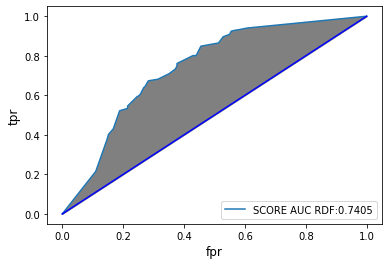

In [0]:
import numpy as np

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "SCORE AUC RDF:"+str(np.round(auc(fpr,tpr),4)))
plt.plot([0,1],[0,1],color='blue')
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

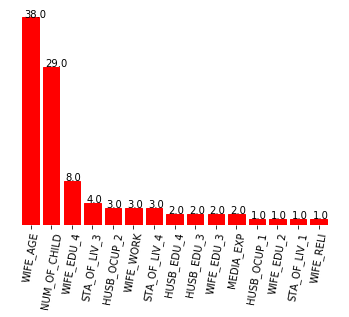

In [0]:
NON_FEATURES = X_train.columns
import numpy as np
IMPORTANCE_FEATURES = 100*np.round(arbrebis.feature_importances_,2)
loca = np.arange(len(IMPORTANCE_FEATURES))
index = np.argsort(IMPORTANCE_FEATURES)[::-1]

IMPORTANCE_FEATURES = IMPORTANCE_FEATURES[index][0:15]
NON_FEATURES = NON_FEATURES[index][0:15]
loca = loca[0:15]
import matplotlib.pyplot as plt
plt.bar(loca,IMPORTANCE_FEATURES,edgecolor='red',color='red')
plt.yticks([])
plt.xticks(loca,NON_FEATURES,color='black',rotation=80)
plt.box(False)
for i in range(0,len(NON_FEATURES)):
    plt.text(loca[i]-0.3,IMPORTANCE_FEATURES[i],str(np.round(IMPORTANCE_FEATURES[i],1)))
plt.show